# Pandas and Python

This report aims to study the use of pandas in python to do time series analyses.

Ce rapport vise à étudier l'utilisation de pandas en python pour faire des analyses de séries chronologiques.

## Bitcoin and Euro

In [130]:
#!/usr/bin/env python3
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

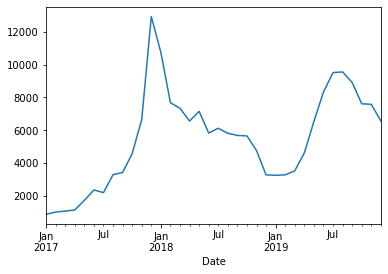

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2020-07-19', '2020-07-20', '2020-07-21', '2020-07-22',
               '2020-07-23', '2020-07-24', '2020-07-25', '2020-07-26',
               '2020-07-27', '2020-07-28'],
              dtype='datetime64[ns]', name='Date', length=2142, freq=None)

In [131]:
bitcoin = pd.read_csv('./BTC-EUR.csv', index_col = 'Date', parse_dates = True)
bitcoin.head()
# bitcoin['Close']['2017':'2019'].plot()
plt.figure(1)
bitcoin.loc['2017':'2019', 'Close'].resample('M').mean().plot()
plt.show(block=False)
bitcoin.index

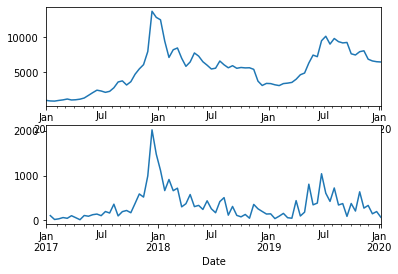

In [132]:
plt.figure(2)
plt.subplot(211)
bitcoin.loc['2017':'2019', 'Close'].resample('2W').mean().plot()
plt.subplot(212)
bitcoin.loc['2017':'2019', 'Close'].resample('2W').std().plot()
plt.show(block=False)

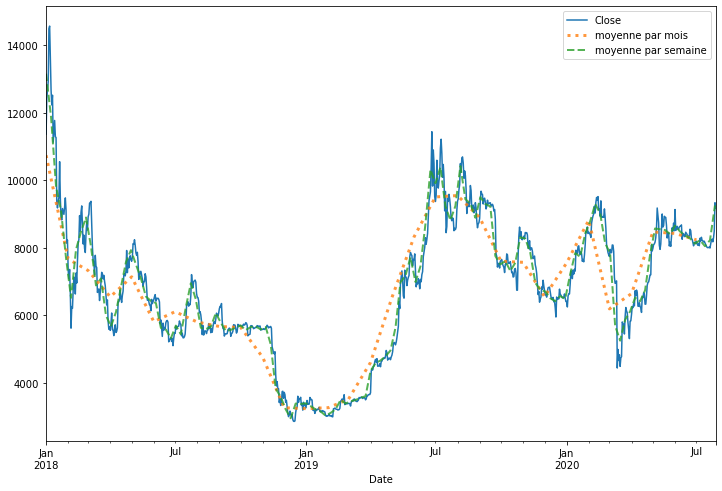

In [133]:
plt.figure(3, figsize=(12, 8))
bitcoin.loc['2018':'2020', 'Close'].plot()
bitcoin.loc['2018':'2020', 'Close'].resample('M').mean().plot(
    label = "moyenne par mois", lw = 3, ls = ":", alpha = 0.8)
bitcoin.loc['2018':'2020', 'Close'].resample('W').mean().plot(
    label = "moyenne par semaine", lw = 2, ls = "--", alpha = 0.8)
plt.legend()
plt.show()


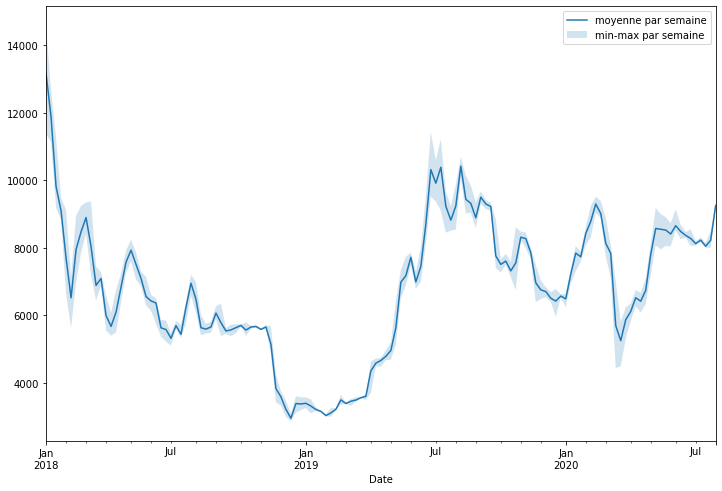

In [134]:
m = bitcoin.loc['2018':'2020', 'Close'].resample('W').agg(['mean', 'std', 'min', 'max'])
plt.figure(4, figsize = (12, 8))
m.loc['2018':'2020', 'mean'].plot(label = "moyenne par semaine")
plt.fill_between(m.index, m['max'], m['min'], alpha = 0.2,
                 label = "min-max par semaine")
plt.legend()
plt.show()

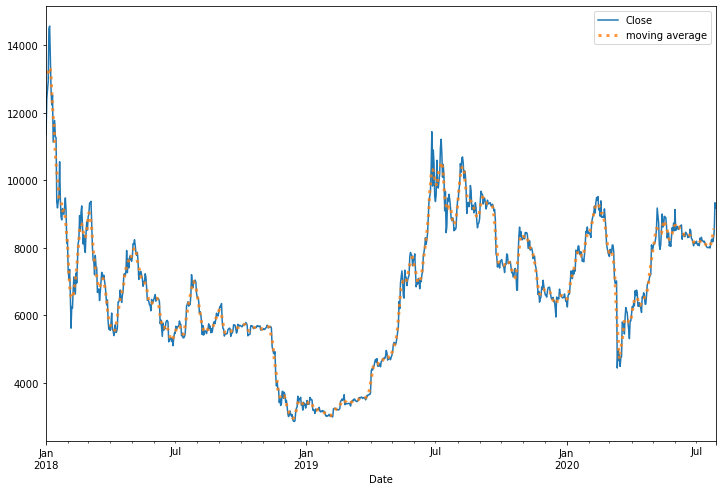

In [135]:
m2 = bitcoin.loc['2018':'2020', 'Close']
plt.figure(5, figsize = (12, 8))
m2.plot(label = "Close")
m2.rolling(window = 7, center = True).mean().plot(
    label = 'moving average', lw = 3, ls = ":", alpha = 0.8)
plt.legend()
plt.show()

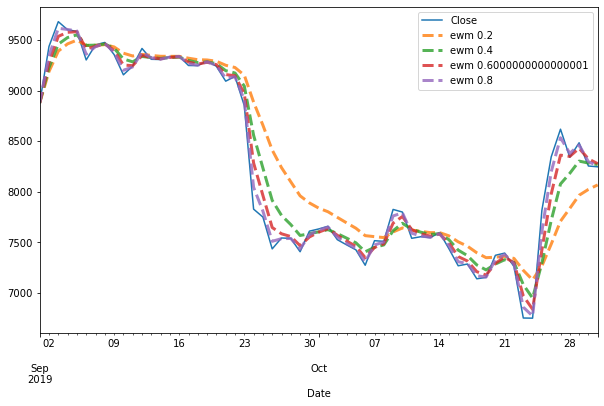

In [136]:
plt.figure(6, figsize = (10, 6))
bitcoin.loc["2019-09":"2019-10", "Close"].plot()
for i in np.arange(0.2, 1, 0.2):
    bitcoin.loc["2019-09":"2019-10", "Close"].ewm(alpha = i).mean().plot(label = f"ewm {i}", lw = 3, ls = "--", alpha = 0.8)
plt.legend()
plt.show()

## Bitcoin and Ethereum

               Open_btc     High_btc      Low_btc    Close_btc  Adj Close_btc  \
Date                                                                            
2015-08-07   255.233948   255.762100   253.128769   254.840027     254.840027   
2015-08-08   254.983139   255.152679   237.635574   237.897186     237.897186   
2015-08-09   238.005646   243.371613   237.414993   241.952362     241.952362   
2015-08-10   242.312881   243.509033   239.726135   240.143463     240.143463   
2015-08-11   240.027252   244.892654   240.676193   244.892654     244.892654   
...                 ...          ...          ...          ...            ...   
2020-07-24  8266.643555  8256.091797  8162.232910  8181.614258    8181.614258   
2020-07-25  8183.838867  8325.772461  8176.197754  8302.227539    8302.227539   
2020-07-26  8304.906250  8599.665039  8281.409180  8499.583984    8499.583984   
2020-07-27  8499.627930  9667.131836  8474.470703  9340.187500    9340.187500   
2020-07-28  9391.512695  951

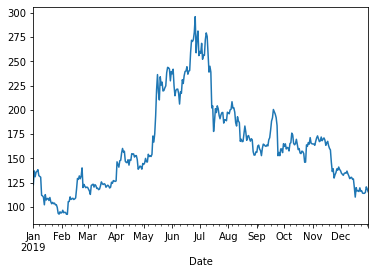

In [137]:
ethereum = pd.read_csv("ETH-EUR.csv", index_col = "Date", parse_dates = True)
ethereum["2019"]["Close"].plot()
innerMerge = pd.merge(bitcoin, ethereum, on = "Date", how = "inner", suffixes = ("_btc", "_eth"))
outerMerge = pd.merge(bitcoin, ethereum, on = "Date", how = "outer", suffixes = ("_btc", "_eth"))
print(innerMerge)
print(outerMerge)
# possible too: left, right

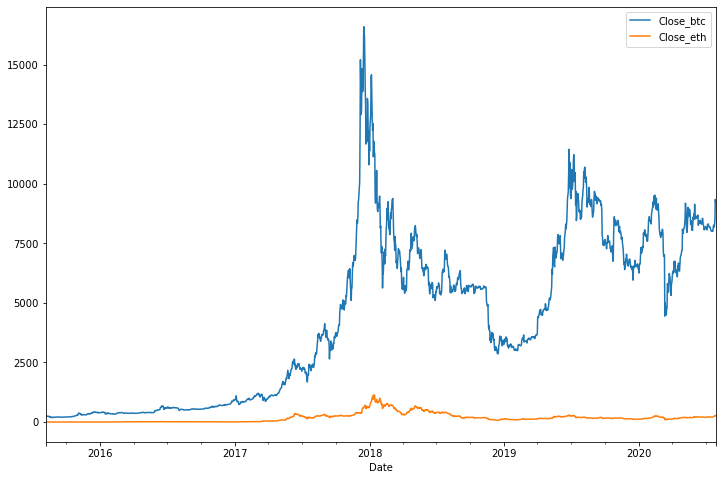

In [138]:
btc_eth = pd.merge(bitcoin, ethereum, on = "Date", how = "inner", suffixes = ("_btc", "_eth"))
btc_eth[["Close_btc", "Close_eth"]].plot(figsize = (12, 8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000255516B6108>,
      dtype=object)

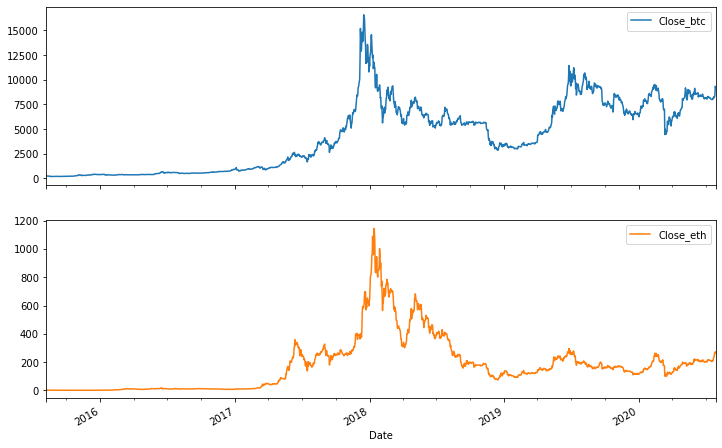

In [139]:
btc_eth[["Close_btc", "Close_eth"]].plot(subplots = True, figsize = (12, 8))

In [140]:
btc_eth[["Close_btc", "Close_eth"]].corr()

,Close_btc,Close_eth
Close_btc,1.000000,0.715486
Close_eth,0.715486,1.000000


## Trading strategy
A little exercise to use `rolling()` and calculate the max and min over the last 28 days, then do a boolean indexing, if "Close" is > max28, then Buy = 1, if it is < min28 then Sell = -1.

Un petit exercice pour utiliser `rolling()` et calculer le max et le min sur les 28 derniers jours, puis faire un boolean indexing, si "Close" est > max28, alors Buy = 1, s'il est < min28 alors Sell = -1.

In [150]:
data = bitcoin.copy()
data["Buy"] = np.zeros(len(data))
data["Sell"] = np.zeros(len(data))

In [151]:
data["RollingMax"] = data["Close"].shift(1).rolling(window = 28).max()
data["RollingMin"] = data["Close"].shift(1).rolling(window = 28).min()
data.loc[data["RollingMax"] < data["Close"], "Buy"] = 1
data.loc[data["RollingMin"] > data["Close"], "Sell"] = -1

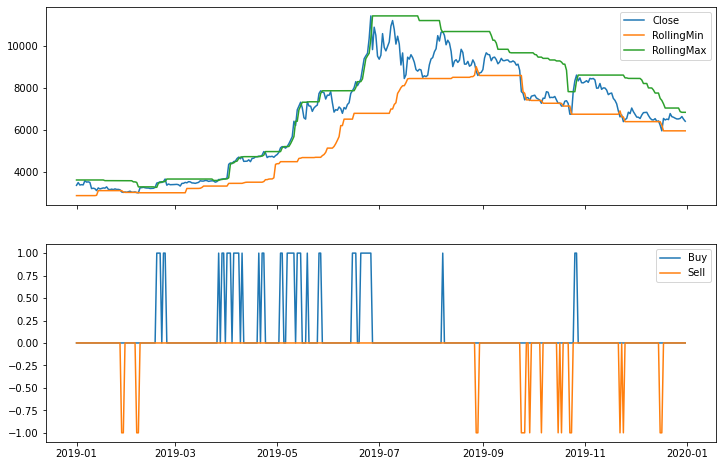

In [159]:
start, end = ("2019", "2019")
fig, ax = plt.subplots(2, figsize = (12, 8), sharex = True)
labels = ("Close", "RollingMin", "RollingMax")
for i in labels:
    ax[0].plot(data.loc[start:end, i])
ax[0].legend(labels)
labels2 = ("Buy", "Sell")
for i in labels2:
    ax[1].plot(data.loc[start:end, i])
ax[1].legend(labels2)

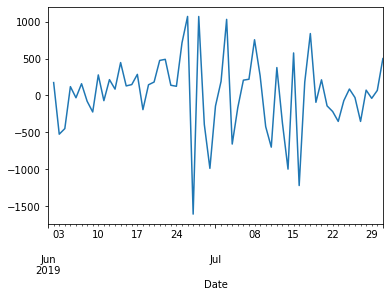

In [160]:
bitcoin["Close"]["2019-06":"2019-07"].diff().plot()